In [1]:
import rdkit
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
from rdkit.Chem import AllChem

from rdradical.main import rdradicalRun, rdradicalRunText, rdradicalReaction, rdradicalReactants
from rdradical import extractor_radical_invert

In [2]:
RDKIT_SMILES_PARSER_PARAMS = Chem.SmilesParserParams()
def str_to_mol(string: str, explicit_hydrogens: bool = True) -> Chem.Mol:

    if string.startswith('InChI'):
        mol = Chem.MolFromInchi(string, removeHs=not explicit_hydrogens)
    else:
        # Set params here so we don't remove hydrogens with atom mapping
        RDKIT_SMILES_PARSER_PARAMS.removeHs = not explicit_hydrogens
        mol = Chem.MolFromSmiles(string, RDKIT_SMILES_PARSER_PARAMS)

    if explicit_hydrogens:
        return mol
        #return Chem.AddHs(mol)
    else:
        return Chem.RemoveHs(mol)

In [3]:
reaction_temp = '([#1&+0:1]-[C@&+0:2]12-[C:3]-[C:4]-[C&+0:5](-[#1&+0:6])(-[#1&+0:7])-[C@@&+0:8]-1(-[#1&+0:9])-[O&+0:10]-2)>>([#1&+0:1]-[C@&+0:2]1(-[C&+0:8]-[#1&+0:9])-[C:3]-[C:4]-[C&+0:5](-[#1&+0:6])(-[#1&+0:7])-[O&+0:10]-1)'
reacts = 'C:1]1([H:7])([H:8])[C:2]([H:9])([H:10])[C@:3]2([H:11])[O:4][C@:5]2([H:12])[C:6]1([H:13])[H:14]'
rad_rt = {}
rad_pt = {}

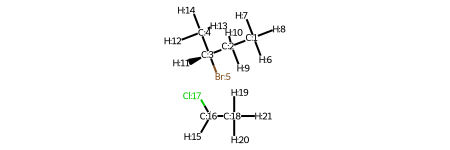

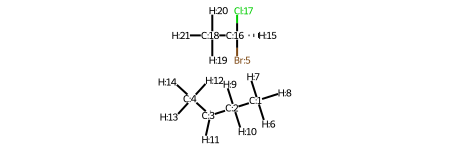

In [4]:
rsmi = '[H:6][C:1]([H:7])([H:8])[C:2]([H:9])([H:10])[C@@:3]([H:11])([C:4]([H:12])([H:13])[H:14])[Br:5].[H:15][C:16]([Cl:17])[C:18]([H:19])([H:20])[H:21]'
psmi = '[H:6][C:1]([H:7])([H:8])[C:2]([H:9])([H:10])[C@@:3]([H:11])([C:4]([H:12])([H:13])[H:14]).[H:15][C@@:16]([Br:5])([Cl:17])[C:18]([H:19])([H:20])[H:21]'
rmol = str_to_mol(rsmi)
display(rmol)
pmol = str_to_mol(psmi)
display(pmol)

In [5]:
reaction = {}
reaction['reactants'] = rsmi
reaction['products'] = psmi
reaction['_id'] = 0
template = extractor_radical_invert.extract_from_reaction(reaction)

{'products': '([#1&+0:5]-[C&+0:6](-[C:8])-[C:9]).([#1&+0:1]-[C@&+0:2](-[Br&+0:7])(-[C:3])-[Cl&+0:4])', 'prod_temp_radical': {'6': 1}, 'reactants': '([#1&+0:1]-[C&+0:2](-[C:3])-[Cl&+0:4]).([#1&+0:5]-[C@&+0:6](-[Br&+0:7])(-[C:8])-[C:9])', 'react_temp_radical': {'2': 1}, 'reaction_smarts': '([#1&+0:1]-[C&+0:2](-[C:3])-[Cl&+0:4]).([#1&+0:5]-[C@&+0:6](-[Br&+0:7])(-[C:8])-[C:9])>>([#1&+0:5]-[C&+0:6](-[C:8])-[C:9]).([#1&+0:1]-[C@&+0:2](-[Br&+0:7])(-[C:3])-[Cl&+0:4])', 'intra_only': False, 'dimer_only': False, 'reaction_id': 0, 'necessary_reagent': ''}


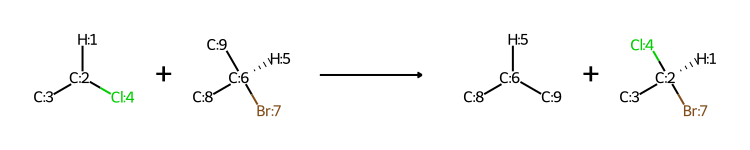

In [6]:
print(template)
reaction_temp = template['reaction_smarts']
rxn = AllChem.ReactionFromSmarts(reaction_temp)
display(rxn)

In [7]:
reaction_temp = template['reaction_smarts']
rad_rt = template['react_temp_radical']
rad_pt = template['prod_temp_radical']
reactants = rsmi.split('.')[1] + '.' + rsmi.split('.')[0]
outcomes_rdradical, mapped_outcome, mapped_outcomes_dup = rdradicalRunText(reaction_temp,rad_rt,rad_pt, reactants)

{'[Br:5][C@H:16]([Cl:17])[CH3:18].[CH3:1][CH2:2][CH:3][CH3:4]': ('[Br:5][C@:16]([H:15])([Cl:17])[C:18]([H:19])([H:20])[H:21].[C:1]([C:2]([C:3]([C:4]([H:12])([H:13])[H:14])[H:11])([H:9])[H:10])([H:6])([H:7])[H:8]', (3, 16, 5))}


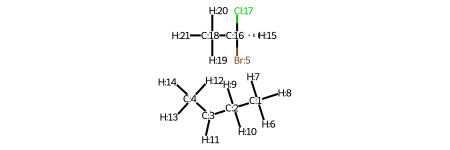

In [8]:
print(mapped_outcome)
for value in mapped_outcome.values():
    mol = str_to_mol(value[0])
    display(mol)